In [4]:
import json

import pingouin as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
colors = json.load(open(r'..\data\metadata\color_schemes.json'))
colors['Non-fasted'] = colors['RBG']
colors['Fasted'] = colors['FBG']
compound_superclasses = json.load(open('../data/metadata/compound_superclasses.json', 'r'))
    
data = pd.read_csv(r'../data/processed/combined_metabolites_data_with_model_params.csv').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

In [ ]:
pg.intraclass_corr()

In [14]:
iccdata = pg.read_dataset('icc')
icc = pg.intraclass_corr(data=iccdata, targets='Wine', raters='Judge', ratings='Scores').round(3)
icc
# iccdata

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.728,11.680,7,24,0.0,"[0.43, 0.93]"
1,ICC2,Single random raters,0.728,11.787,7,21,0.0,"[0.43, 0.93]"
2,ICC3,Single fixed raters,0.729,11.787,7,21,0.0,"[0.43, 0.93]"
3,ICC1k,Average raters absolute,0.914,11.680,7,24,0.0,"[0.75, 0.98]"
4,ICC2k,Average random raters,0.914,11.787,7,21,0.0,"[0.75, 0.98]"
5,ICC3k,Average fixed raters,0.915,11.787,7,21,0.0,"[0.75, 0.98]"


In [15]:
df = data[data_cols].T.join(fg[['week', 'animal', 'bg_type']])
df

,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,...,l_913,l_914,l_915,l_916,l_917,l_918,l_919,week,animal,bg_type
1091_8_FBG,18.724636,20.779580,24.180859,24.887680,27.518513,23.065294,22.586018,21.670779,22.690034,22.292465,...,17.106814,17.133054,19.413597,16.606829,19.073429,19.091184,18.620317,8,1091,FBG
1091_9_FBG,18.448028,22.377216,23.025067,24.944840,27.787453,24.471186,23.747405,23.695060,23.979612,23.396744,...,20.787383,20.307432,20.588350,19.827015,19.839354,19.815435,18.866365,9,1091,FBG
1091_10_FBG,17.600816,20.575689,23.583080,24.713250,27.163433,23.132749,22.706016,22.116365,22.690580,21.771079,...,17.710758,18.448910,19.899861,18.266873,20.133479,19.996615,19.778245,10,1091,FBG
1093_8_FBG,16.451618,20.902141,23.548337,24.647222,27.405718,23.138487,22.633815,22.139245,22.665739,22.337209,...,19.073269,19.655742,20.349529,20.474664,21.315704,21.404572,21.063577,8,1093,FBG
1093_9_FBG,18.286166,20.877460,22.368788,24.526725,27.051667,23.178672,22.559027,22.469655,22.629048,22.274394,...,21.175953,20.788956,21.407793,21.111930,21.529536,21.430516,20.968101,9,1093,FBG
1093_10_FBG,18.054307,20.415204,22.704412,24.404735,26.756463,23.060708,22.793575,22.273762,22.923587,21.875123,...,18.581294,19.020141,20.020178,18.951163,20.116586,20.214040,19.638826,10,1093,FBG
1060_8_FBG,17.594730,20.198771,23.895235,24.714910,17.148994,22.653452,22.084504,21.397206,22.065355,21.679060,...,20.648780,20.005141,20.999142,19.774817,20.517490,20.603688,19.836798,8,1060,FBG
1060_9_FBG,21.809716,20.524661,24.263211,24.520405,19.169210,23.207043,22.450039,21.424020,22.534742,21.849560,...,20.389699,19.797970,21.377454,20.184092,20.671826,20.788152,20.234283,9,1060,FBG
1060_10_FBG,18.748109,20.303969,23.084387,24.792384,27.209158,22.793616,22.563256,21.784634,22.664376,21.631447,...,16.197032,17.768934,20.033965,17.930418,19.568571,19.769735,19.279616,10,1060,FBG
1062_8_FBG,18.098242,21.019048,24.873347,24.787384,21.774699,23.221875,22.352220,21.964129,22.346725,22.098343,...,17.166214,17.882779,19.507955,17.567143,19.348489,19.240306,18.585339,8,1062,FBG


In [42]:
pg.intraclass_corr(data=df, targets='animal', raters='bg_type', ratings='m_11').iloc[[2, 5]]

,Type,Description,ICC,F,df1,df2,pval,CI95%
2,ICC3,Single fixed raters,-0.130762,0.768718,9,9,0.649223,"[-0.68, 0.51]"
5,ICC3k,Average fixed raters,-0.300867,0.768718,9,9,0.649223,"[-4.24, 0.68]"


In [21]:
r = {}
for feature in data.index:
    icc = pg.intraclass_corr(data=df, targets='animal', raters='bg_type', ratings=feature)
    r[feature] = icc.iloc[-1, 2]
#     break
r

{'m_0': 0.9575687944877825,
 'm_1': -0.2666385720858403,
 'm_2': -0.015312396717036134,
 'm_3': 0.7750479941191726,
 'm_4': 0.5755081151238964,
 'm_5': 0.603000234092867,
 'm_6': 0.282618393525423,
 'm_7': 0.5235637886849063,
 'm_8': 0.2993799775287717,
 'm_9': -1.856629708539787,
 'm_10': 0.807555462203376,
 'm_11': -0.30086690389561566,
 'm_12': 0.23767504305502535,
 'm_13': -0.1510143900840156,
 'm_14': 0.5799201575187466,
 'm_15': 0.6482506653500952,
 'm_16': 0.6541952491654368,
 'm_17': 0.16512670317359643,
 'm_18': 0.5070787220691529,
 'm_19': 0.716786217071679,
 'm_20': 0.18001628523505328,
 'm_21': 0.5125433434997823,
 'm_22': 0.38076279684046477,
 'm_23': -0.915593444283337,
 'm_24': -5.107318044416498,
 'm_25': 0.6734702753512214,
 'm_26': -0.6001271503331367,
 'm_27': 0.8328160219669875,
 'm_28': 0.34440215032387217,
 'm_29': 0.2144901605785553,
 'm_30': -0.2084711767033178,
 'm_31': -0.011337673397329143,
 'm_32': 0.6928742423937432,
 'm_33': 0.8847426086486169,
 'm_34': 0.

In [28]:
data = data.join(pd.Series(r, name='icc'))
data

,unique_id,ID,m/z,RT,molec_class,Type,polarity,lc_type,superclass,1091_8_FBG,...,model_param_sampling[T.RBG]:ogtt,qval_fed,qval_fasted,pval_fed,coef_fed,intercept_fed,pval_fasted,coef_fasted,intercept_fasted,icc
i,,,,,,,,,,,,,,,,,,,,,
m_0,Unidentified_2.353_141.0659,Unidentified,141.06591,2.353,Unidentified,metabolite,-,HILIC,Unidentified,18.724636,...,0.000023,0.005188,0.047076,1.774542e-03,0.000093,14.839852,0.005889,6.955843e-05,15.536056,0.957569
m_1,Unidentified_11.539_180.0585,Unidentified,180.05850,11.539,Unidentified,metabolite,-,HILIC,Unidentified,20.779580,...,0.000044,0.000001,0.563346,3.159016e-08,0.000037,20.089208,0.337609,-6.598915e-06,21.056889,-0.266639
m_2,Urocanic acid_11.365_139.0503,Urocanic acid,139.05028,11.365,Nitrogen heterocycle,metabolite,+,HILIC,Nitrogen heterocycle,24.180859,...,-0.000009,0.559416,0.980767,4.526725e-01,-0.000010,23.382609,0.955407,-6.092323e-07,23.314805,-0.015312
m_3,Uridine_7.513_243.0615,Uridine,243.06152,7.513,Nitrogen heterocycle,metabolite,-,HILIC,Nitrogen heterocycle,24.887680,...,0.000005,0.525163,0.115738,4.126169e-01,-0.000004,23.982960,0.029282,-9.615231e-06,24.923579,0.775048
m_4,Uric acid_12.732_167.0201,Uric acid,167.02007,12.732,Nitrogen heterocycle,metabolite,-,HILIC,Nitrogen heterocycle,27.518513,...,0.000091,0.558230,0.073041,4.510871e-01,-0.000032,26.522464,0.013072,-1.235729e-04,29.615121,0.575508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_915,TG 18:0_18:0_18:0_19.885_908.8654,TG 18:0_18:0_18:0,908.86542,19.885,TG,lipid,+,RP,Glycerolipid,19.413597,...,0.000051,0.000204,0.992054,3.003979e-05,0.000051,18.452536,0.982743,2.209285e-07,20.114299,-0.082327
l_916,Unidentified_20.144_948.8965,Unidentified,948.89648,20.144,Unidentified,lipid,+,RP,Unidentified,16.606829,...,0.000083,0.000675,0.364210,1.311126e-04,0.000054,16.772587,0.162724,-2.865160e-05,19.687001,-0.995742
l_917,Unidentified_20.148_897.8253,Unidentified,897.82532,20.148,Unidentified,lipid,+,RP,Unidentified,19.073429,...,0.000055,0.004923,0.325139,1.666406e-03,0.000038,16.665978,0.135321,-1.689329e-05,20.429506,-0.175234


(array([ 1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  2.,  1.,  1.,
         3.,  1.,  7.,  8.,  7.,  1.,  5.,  8., 17., 15., 24., 42., 37.,
        64., 83., 81., 34.]),
 array([-3.95117669, -3.78774906, -3.62432143, -3.4608938 , -3.29746617,
        -3.13403854, -2.97061091, -2.80718327, -2.64375564, -2.48032801,
        -2.31690038, -2.15347275, -1.99004512, -1.82661749, -1.66318986,
        -1.49976223, -1.3363346 , -1.17290697, -1.00947934, -0.84605171,
        -0.68262408, -0.51919645, -0.35576881, -0.19234118, -0.02891355,
         0.13451408,  0.29794171,  0.46136934,  0.62479697,  0.7882246 ,
         0.95165223]),
 <BarContainer object of 30 artists>)

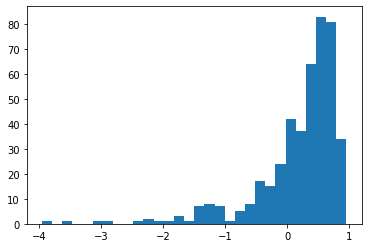

In [30]:
plt.hist(data.loc[data['ID'] != 'Unidentified', 'icc'], bins=30)